In [1]:
import numpy as np
import keras
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import time

2021-12-07 20:51:26.145605: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-12-07 20:51:26.146009: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-07 20:51:26.147415: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2021-12-07 20:51:26.213713: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-07 20:51:26.232140: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3193925000 Hz


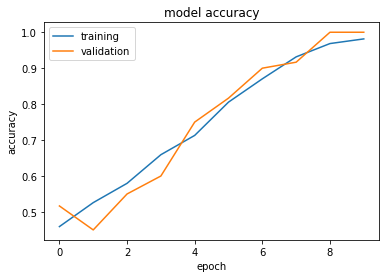

Accuracy: 97.00


In [2]:
# generate a simple model for test. 
# the model is a 3 layers neural network, the 1st layer is 12 neurons, relu is the activation function
# the second layer is 8 neurons, relu is the activation functioin
# the third layer is 1 neurons, sigmoid is the activation function 
# prepare the data set X is a numpy array strore the x1 and x2, Y store the classes for X. x2>=x1 is class 1, x2<x1 is class 2
np.random.seed(0)
X = np.random.uniform(0. , 100., [700,2])
Y = np.zeros((700, 1))

for row in range(700):
    if X[row][0] <= X[row][1]:
        Y[row] = 1
    else:
        Y[row] = 0
# divide into train and test data set
X_train = X[:600]
X_test = X[600:]
Y_train = Y[:600]
Y_test = Y[600:]

model = Sequential()

model.add(Dense(units=12, activation="relu", input_dim=2))
model.add(Dense(units=8, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

# plot the losses
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history=model.fit(X_train, Y_train, batch_size=100,epochs=10, verbose=0, validation_split=.1)
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
print('Accuracy: %.2f' % (accuracy*100))

In [19]:
# save model
model.save("x1_smaller_than_x2.h5")

In [ ]:
# check the output is the probability that x1 is less than x2
np.random.seed(2)
xx = np.random.uniform(0., 100., [10,2])
yy = model_2.predict(xx)
print(xx)
print(yy)

In [4]:
# try to find out that when x1 is really close to x2 then the output is really near to 0.5
np.random.seed(2)
xx2 = np.ones((7,2))
xx2[0] = [6.,6.23]
xx2[1] = [2.,2.2]
xx2[2] = [20.,20.]
xx2[4] = [45.,45.1]
xx2[5] = [36.,36.44]
xx2[6] = [90., 8.]
print(xx2)

yy2 = model.predict(xx2)
print(yy2)

[[ 6.    6.23]
 [ 2.    2.2 ]
 [20.   20.  ]
 [ 1.    1.  ]
 [45.   45.1 ]
 [36.   36.44]
 [90.    8.  ]]
[[5.2072203e-01]
 [5.0731868e-01]
 [5.4876983e-01]
 [4.9318632e-01]
 [6.2515146e-01]
 [6.1822349e-01]
 [5.7270846e-08]]
